## Singular value decomposition

Section 7.3.

The singular value decomposition (SVD) of a matrix has many applications ([math exchange discussion](https://mathoverflow.net/questions/408504/listing-applications-of-the-svd), [Daniela Witten's enthusiasm](https://twitter.com/WomenInStat/status/1285610321747611653?s=20)) including [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis) and image compression.

If $A$ is $m$ x $n$ then the SVD is $A = USV^*$ where $U$ and $V$ are unitary (conjugate transpose is inverse) and $S$ is real, diagonal and has non-negative elements. The singular values (diagonal of $S$) are unique, but the unitary matrices are not unique. If $A$ is real, then real matrices $U$ and $V$ can be found.

The non-zero eigenvalues of $A^*A$ are the squares of the singular values of $A$.

If $A$ has more rows than columns ($m>n$) there is a thin form of the SVD (just like there was a thin form of the QR decomposition). Drop the rows $n+1$ to $m$ of $S$ and columns $n+1$ to $m$ of $U$.


The singular values give the condition number and norm of a matrix.

In [1]:
using LinearAlgebra
A1 = rand(5,5)
A2 = [ 1/(1+i+j) for i in 1:5, j in 1:5]

5×5 Matrix{Float64}:
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125
 0.2       0.166667  0.142857  0.125     0.111111
 0.166667  0.142857  0.125     0.111111  0.1
 0.142857  0.125     0.111111  0.1       0.0909091

In [2]:
A1_singular = svdvals(A1)

5-element Vector{Float64}:
 2.9962920210457997
 0.6531094118638961
 0.33779315518086883
 0.24018203506190822
 0.028983168282321586

In [3]:
opnorm(A1, 2), A1_singular[1]

(2.9962920210457997, 2.9962920210457997)

In [4]:
cond(A1), A1_singular[1]/A1_singular[end]

(103.38041693231314, 103.38041693231314)

In [5]:
svdvals(A2)

5-element Vector{Float64}:
 0.8337897940953767
 0.043097883778114174
 0.0012998242525619358
 2.2996195373489706e-5
 1.7988925196852449e-7

## Comparison with eigendecomposition for square symmetric matrices

Why SVD instead of EVD (eigenvalues)? 

* You can find the SVD of any matrix (eigenvalues only exist for square matrices and there are degenerate cases).
* For a square, symmetric $A$, you can write $A = X^TX$ and then the singular vectors of $X$ are the eigenvectors of $A$ and the singular values of $X$ are the squareroot of the eigenvalues of $A$.

There are a few ways to compute the SVD, one of which is to use the QR iteration we discussed to find eigenvalues, right and left eigenvalues. We won't discuss methods to compute the SVD in detail.

In [34]:
X = rand(5,5)
A = X' * X  # This matrix is commonly formed when solving overdetermined linear systems (regression)

5×5 Matrix{Float64}:
 0.971045  1.17895  0.714493  0.834131  1.04067
 1.17895   1.67342  1.06181   1.40359   1.25921
 0.714493  1.06181  1.10639   1.30825   0.876628
 0.834131  1.40359  1.30825   2.1499    1.4084
 1.04067   1.25921  0.876628  1.4084    1.54311

In [35]:
svd(X).V 

5×5 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.347307  -0.539419   0.0705615   0.188082   0.740305
 -0.487632  -0.366255   0.431501   -0.529163  -0.402326
 -0.377367   0.273874   0.486407    0.710123  -0.204257
 -0.539087   0.672354  -0.147755   -0.347      0.339242
 -0.456698  -0.218672  -0.741893    0.244802  -0.365071

In [36]:
eigen(A).vectors

5×5 Matrix{Float64}:
  0.740305   0.188082  -0.0705615   0.539419  -0.347307
 -0.402326  -0.529163  -0.431501    0.366255  -0.487632
 -0.204257   0.710123  -0.486407   -0.273874  -0.377367
  0.339242  -0.347      0.147755   -0.672354  -0.539087
 -0.365071   0.244802   0.741893    0.218672  -0.456698

In [37]:
svd(X).S .^ 2

5-element Vector{Float64}:
 6.065847090946369
 0.7909428762686467
 0.41750626805555163
 0.16732686158052362
 0.002242589936189289

In [38]:
eigen(A).values

5-element Vector{Float64}:
 0.0022425899361888497
 0.16732686158052318
 0.4175062680555508
 0.7909428762686445
 6.065847090946368

## Dimension reduction

Section 7.5.

The SVD can be used to reconstruct approximations to a matrix using less information. We select the columns and rows of $U$ and $V$ that correspond to the largest singular values.

Define $A_k = \sum_{i=1}^k \sigma_iu_iv_i^*$. This is commonly written as $U_kS_kV_k^*$ where the $k$ subscript means to take the first k columns and rows of $U$ and $V$ and upper-left square part of $S$.

In [11]:
function my_svd_approx(A, k)
    U,σ,V = svd(A) 
    Ak = U[:,1:k]*diagm(σ[1:k])*V[:,1:k]'
end

my_svd_approx (generic function with 1 method)

Get a couple of images:

In [12]:
using Images, FileIO, HTTP
t = tempname()
image_path = "https://cdn.dal.ca/faculty/science/math-stats/_jcr_content/contentPar/featureslider/featureSlider/featureslide_50828652/image.adaptive.320.high.jpg/1533923288644.jpg"
HTTP.download(image_path, t, update_period = Inf)


┌ Warning: Reading one byte at a time from HTTP.Stream is inefficient.
│ Use: io = BufferedInputStream(http::HTTP.Stream) instead.
│ See: https://github.com/BioJulia/BufferedStreams.jl
└ @ HTTP.Streams ~/.julia/packages/HTTP/RxlHW/src/Streams.jl:240


"/var/folders/f9/hrk12n5x4cggf82gcnlx23bm0000gn/T/jl_yBY5q3Sri7"

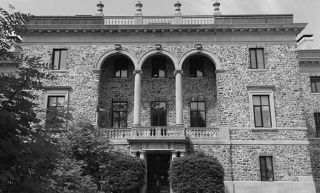

In [13]:
img = load(t)
Chase = @. Float32(Gray(img))
Gray.(Chase)

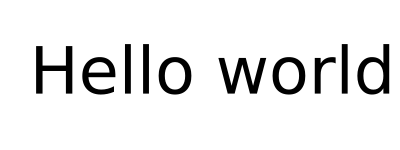

In [14]:
using Plots
plot(annotations=(0.5,0.5, text("Hello world", 44, :center, :middle)),
    grid=:none, frame=:none, size=(400,150))
savefig("hello.png")
img = load("hello.png")
HW = @. Float32(Gray(img))
Gray.(HW)

In [15]:
size(HW)

(150, 400)

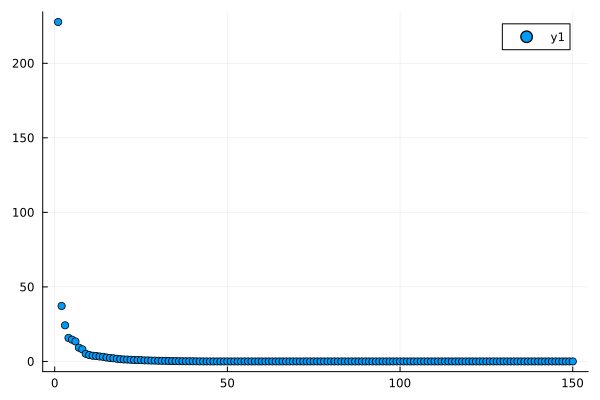

In [16]:
scatter(svdvals(HW)) #  , yscale = :log10)

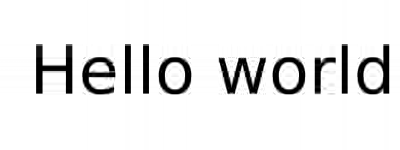

In [48]:
Gray.(my_svd_approx(HW, 10))

In [18]:
U,σ,V = svd(HW) 
size(U[:,1:10]), size(V[:,1:10]')

((150, 10), (10, 400))

In [19]:
prod(size(HW)), 150 * 10 + 10 + 10*400

(60000, 5510)

In [20]:
function svd_size(A, k) 
    m, n = size(A)
    s = m*k + k + k*n
    s, s/(m*n)
end

svd_size (generic function with 1 method)

In [21]:
svd_size(HW, 10)

(5510, 0.09183333333333334)

In [22]:
size(Chase)

(193, 320)

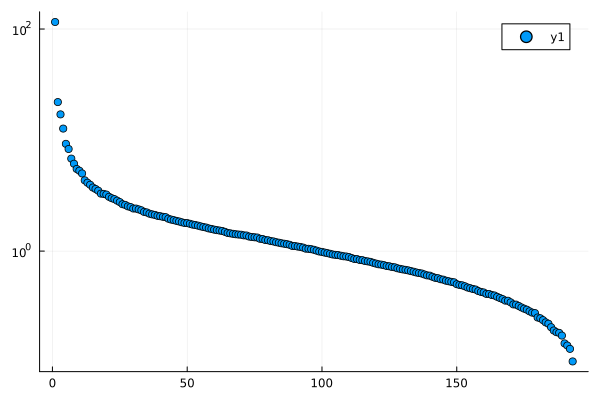

In [23]:
scatter(svdvals(Chase), yscale = :log10)

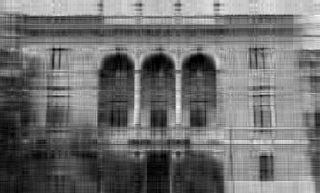

In [51]:
Gray.(my_svd_approx(Chase, 10))

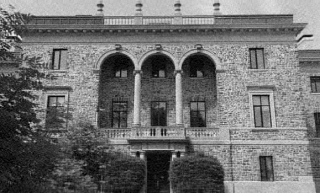

In [52]:
Gray.(my_svd_approx(Chase, 75))

In [26]:
svd_size(Chase, 30)

(15420, 0.2496761658031088)

Iris data from R

In [27]:
using RDatasets
iris = dataset("datasets", "iris")
irisM = Matrix(iris[:,1:4])
svdvals(irisM)

4-element Vector{Float64}:
 95.95991387196453
 17.761033657328564
  3.460930930386973
  1.8848263059180457

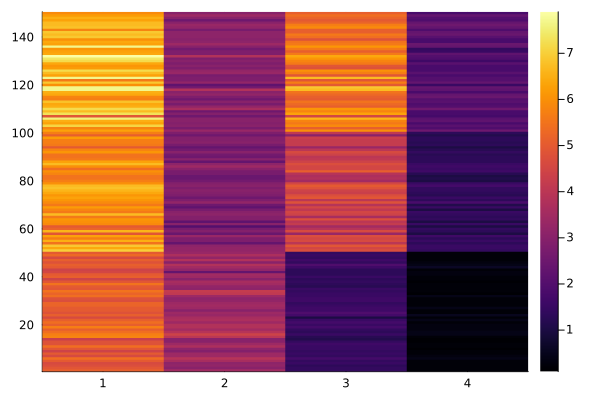

In [28]:
using Plots
heatmap(irisM)

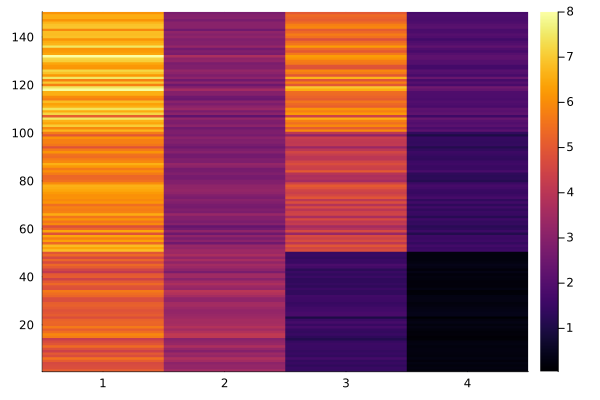

In [29]:
heatmap(my_svd_approx(irisM, 2))

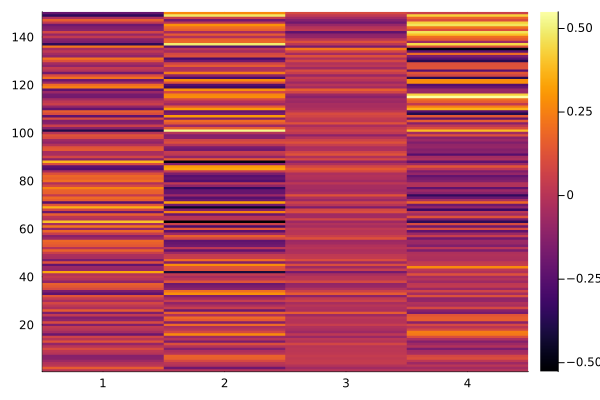

In [30]:
heatmap(irisM .- my_svd_approx(irisM, 2))

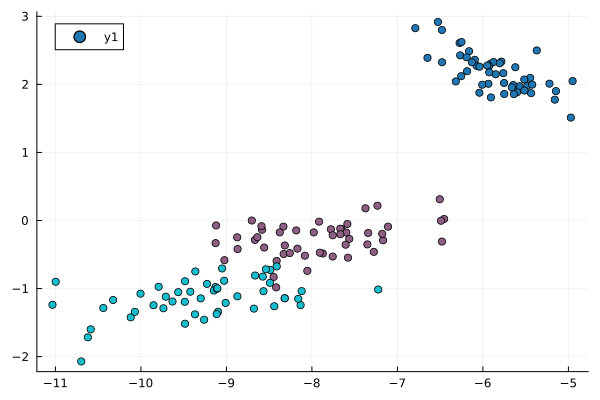

In [31]:
using CategoricalArrays
colours = palette(:tab10, 3)
U, σ, V = svd(irisM);
scatter(irisM * V[:,1], irisM * V[:,2], color = colours[levelcode.(iris[:, :Species])]) 

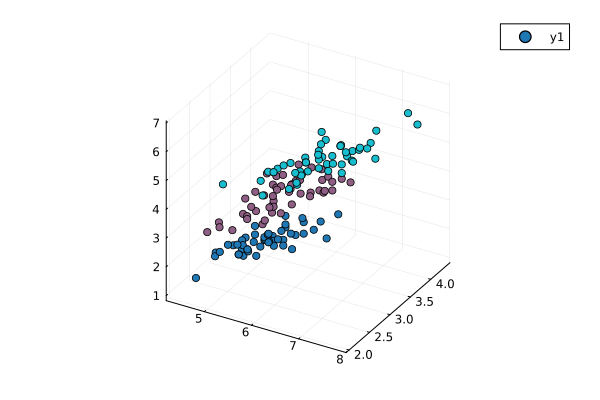

In [32]:
scatter(irisM[:,1], irisM[:,2], irisM[:,3], color = colours[levelcode.(iris[:, :Species])]) 

In [33]:
import PlotlyJS
PlotlyJS.plot([PlotlyJS.scatter3d(; x= irisM[:,1], y= irisM[:,2], z = irisM[:,3], 
                                   mode = "markers",
 marker = PlotlyJS.attr(size = 5, color = colours[levelcode.(iris[:, :Species])]
))])  

WebIO._IJuliaInit()

data: [
  "scatter3d with fields marker, mode, type, x, y, and z"
]

layout: "layout with fields margin and template"

For details on the precise connection between PCA and SVD see, e.g., https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

### Other applications

The SVD is useful for other applications, for example to approximate (simplify) a graph adjacency matrix, or a matrix of works and words for text ([latent semantic](https://en.wikipedia.org/wiki/Latent_semantic_analysis)) analysis or web page searching.
